In [1]:
import numpy as np , matplotlib.pyplot as plt , seaborn as sns
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sony-research/Data_Science_Challenge.csv


# Load The Dataset

In [2]:
df = pd.read_csv('/kaggle/input/sony-research/Data_Science_Challenge.csv')
df_copy = df.copy()
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

* State: The state where a customer comes from
* Account length: Number of days a customer has been using services
* Area code: The area where a customer comes from
* Phone number: The phone number of a customer
* International Plan: The status of customer international plan
* Voicemail plan: The status of customer voicemail plan
* No. vmail msgs: Number of voicemail message sent by a customer
* Total day minutes: Total call minutes spent by a customer during day time
* Total day calls: Total number of calls made by a customer during day time
* Total day charge: Total amount charged to a customer during day time
* Total eve minutes: Total call minutes spent by a customer during evening time
* Total eve calls: Total number of calls made by a customer during evening time
* Total eve charge: Total amount charged to a customer during evening time
* Total night minutes: Total call minutes spent by a customer during night time
* Total night calls: Total number of calls made by a customer during night time
* Total night charge: Total amount charged to a customer during night time
* Total intl minutes: Total international call minutes spent by a customer
* Total intl calls: Total number of international calls made by a customer
* Total int charge: Total international call amount charged to a customer
* Customer service calls: Total number of customer service calls made by a customer
* churn: Whether a customer is churned or not

**Initial Inspection**
* Shape
* data types
* missing values
* duplicate values
* summary statistics
* Outlier detection
* Class balance

**Shape**

In [3]:
df.shape

(3333, 21)

**Data Types**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

**Missing Values**

In [5]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

**Duplicate Values**

In [6]:
df.duplicated().sum()

0

**Summary Statistics**

In [7]:
#Summary Statistics: Numerical variables
df.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [8]:
#Summary Statistics: Categorical variables
df.describe(include = 'object')

state phone number international plan voice mail plan
count   3333         3333               3333            3333
unique    51         3333                  2               2
top       WV     382-4657                 no              no
freq     106            1               3010            2411

# Outlier Detection

In [9]:
def detect_outliers_iqr(df):
    outlier_count = {}
    for column in df.select_dtypes(include='number'):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count[column] = outliers.shape[0]
    return outlier_count

outliers_iqr = detect_outliers_iqr(df)
outliers_df = pd.DataFrame(list(outliers_iqr.items()) , columns=['Column', 'Number of Outliers'])
outliers_df

Column  Number of Outliers
0           account length                  18
1                area code                   0
2    number vmail messages                   1
3        total day minutes                  25
4          total day calls                  23
5         total day charge                  25
6        total eve minutes                  24
7          total eve calls                  20
8         total eve charge                  24
9      total night minutes                  30
10       total night calls                  22
11      total night charge                  30
12      total intl minutes                  46
13        total intl calls                  78
14       total intl charge                  49
15  customer service calls                 267

# Class Balance

Class Balance in dataFrame (as percentages):
churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64


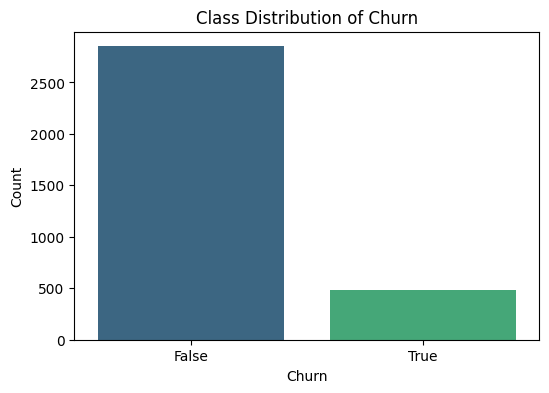

In [10]:
class_balance = df['churn'].value_counts(normalize=True) * 100
print("Class Balance in dataFrame (as percentages):")
print(class_balance)

#plot the class balance
plt.figure(figsize=(6,4))
sns.countplot(x='churn' , data=df , palette='viridis')
plt.title('Class Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

Based on initial inspection, we can conclude that:
1. There are 3333 observations, each unique (no duplicates and all phone numbers unique), 20 features and 1 target variable(Churn).
2. None of the columns have any missing data.
3. The data types of all features are correct except "area code" which can be seen when we describe the numerical features. Mean "area code" doesn't make any sense and hence this data type must be changed in data pre-processing stage.
4. Most phone numbers belong to Wyoming (WY) state.
5. 3010 out of 3333 (90%) people don't have an international plan and 2411 out of 3333 (72%) don't have a voice mail plan.
6. Majority of columns have outliers. We need to handle them so that certain models don't get affected by outliers.
7. We have highly imbalanced dataset: 85.5% customers didn't churn while only 14.5% did.

Thus:
* This is a classification problem.
* Use model evaluation criteria other than accuracy (since randomly stating no customer will churn will give us 85.5% accuracy).Metrics like precision, recall, F1-score, ROC-AUC curve will become important.
* If identifying churned customers is important, make sure we perform oversampling/undersampling so that our model learns the minority class as well. Not doing this will lead to our model getting biased towards majority class.


# Data Processing
* Handling Missing Data: NOT Required
* Handling Duplicate Data: NOT Required
* Correct Data Types
* Drop features if required

# Correct Data Type


In [11]:
#Correct Data type of area code
df['area code'] = df['area code'].astype('object')
df.describe(include='object')

state  area code phone number international plan voice mail plan
count   3333       3333         3333               3333            3333
unique    51          3         3333                  2               2
top       WV        415     382-4657                 no              no
freq     106       1655            1               3010            2411

Thus, we can see there are 3 area codes in the dataframe. However, 1655 out of 3333(~50%) belong to area code 415.

# Drop unwanted features
* Q: Will column phone number give us any information and should it be kept or dropped?

In [12]:
df['phone number'].str.replace('-','').str.len().value_counts()

phone number
7    3333
Name: count, dtype: int64

Thus, since every phone number is of same length, this column can't provide us much information and should be dropped.

In [13]:
#Drop the 'phone number' column
df = df.drop('phone number',axis=1)
df.sample(n=5)

state  account length area code international plan voice mail plan  \
1593    KS             105       415                yes              no   
1449    CO             192       415                 no              no   
2422    KY              38       408                 no             yes   
495     FL             161       415                yes              no   
2574    OR              97       415                 no              no   

      number vmail messages  total day minutes  total day calls  \
1593                      0              273.9              119   
1449                      0              221.6              101   
2422                     36              115.4               98   
495                       0              156.1              114   
2574                      0              146.0              121   

      total day charge  total eve minutes  total eve calls  total eve charge  \
1593             46.56              278.6              103             23.68   
1449             37.67              285.2               50             24.24   
2422             19.62              166.2               83             14.13   
495              26.54              180.3               63             15.33   
2574             24.82              203.0              141             17.26   

      total night minutes  total night calls  total night charge  \
1593                255.3                 90               11.49   
1449                167.4                 83                7.53   
2422                184.7                 79                8.31   
495                 179.6                115                8.08   
2574                151.8                120                6.83   

      total intl minutes  total intl calls  total intl charge  \
1593                10.9                 7               2.94   
1449                12.7                 6               3.43   
2422                15.2                 6               4.10   
495                 11.1                 9               3.00   
2574                13.3                 2               3.59   

      customer service calls  churn  
1593                       1   True  
1449                       4  False  
2422                       2  False  
495                        2  False  
2574                       1  False

# Exploratory Data Analysis (EDA)
* Univariate analysis of numerical and categorical features.
* Multi-variate analysis to learn any correlations between features.
* Explore the relationships between features and the target variable (Churn).

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   object 
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

# Distribution of numerical features

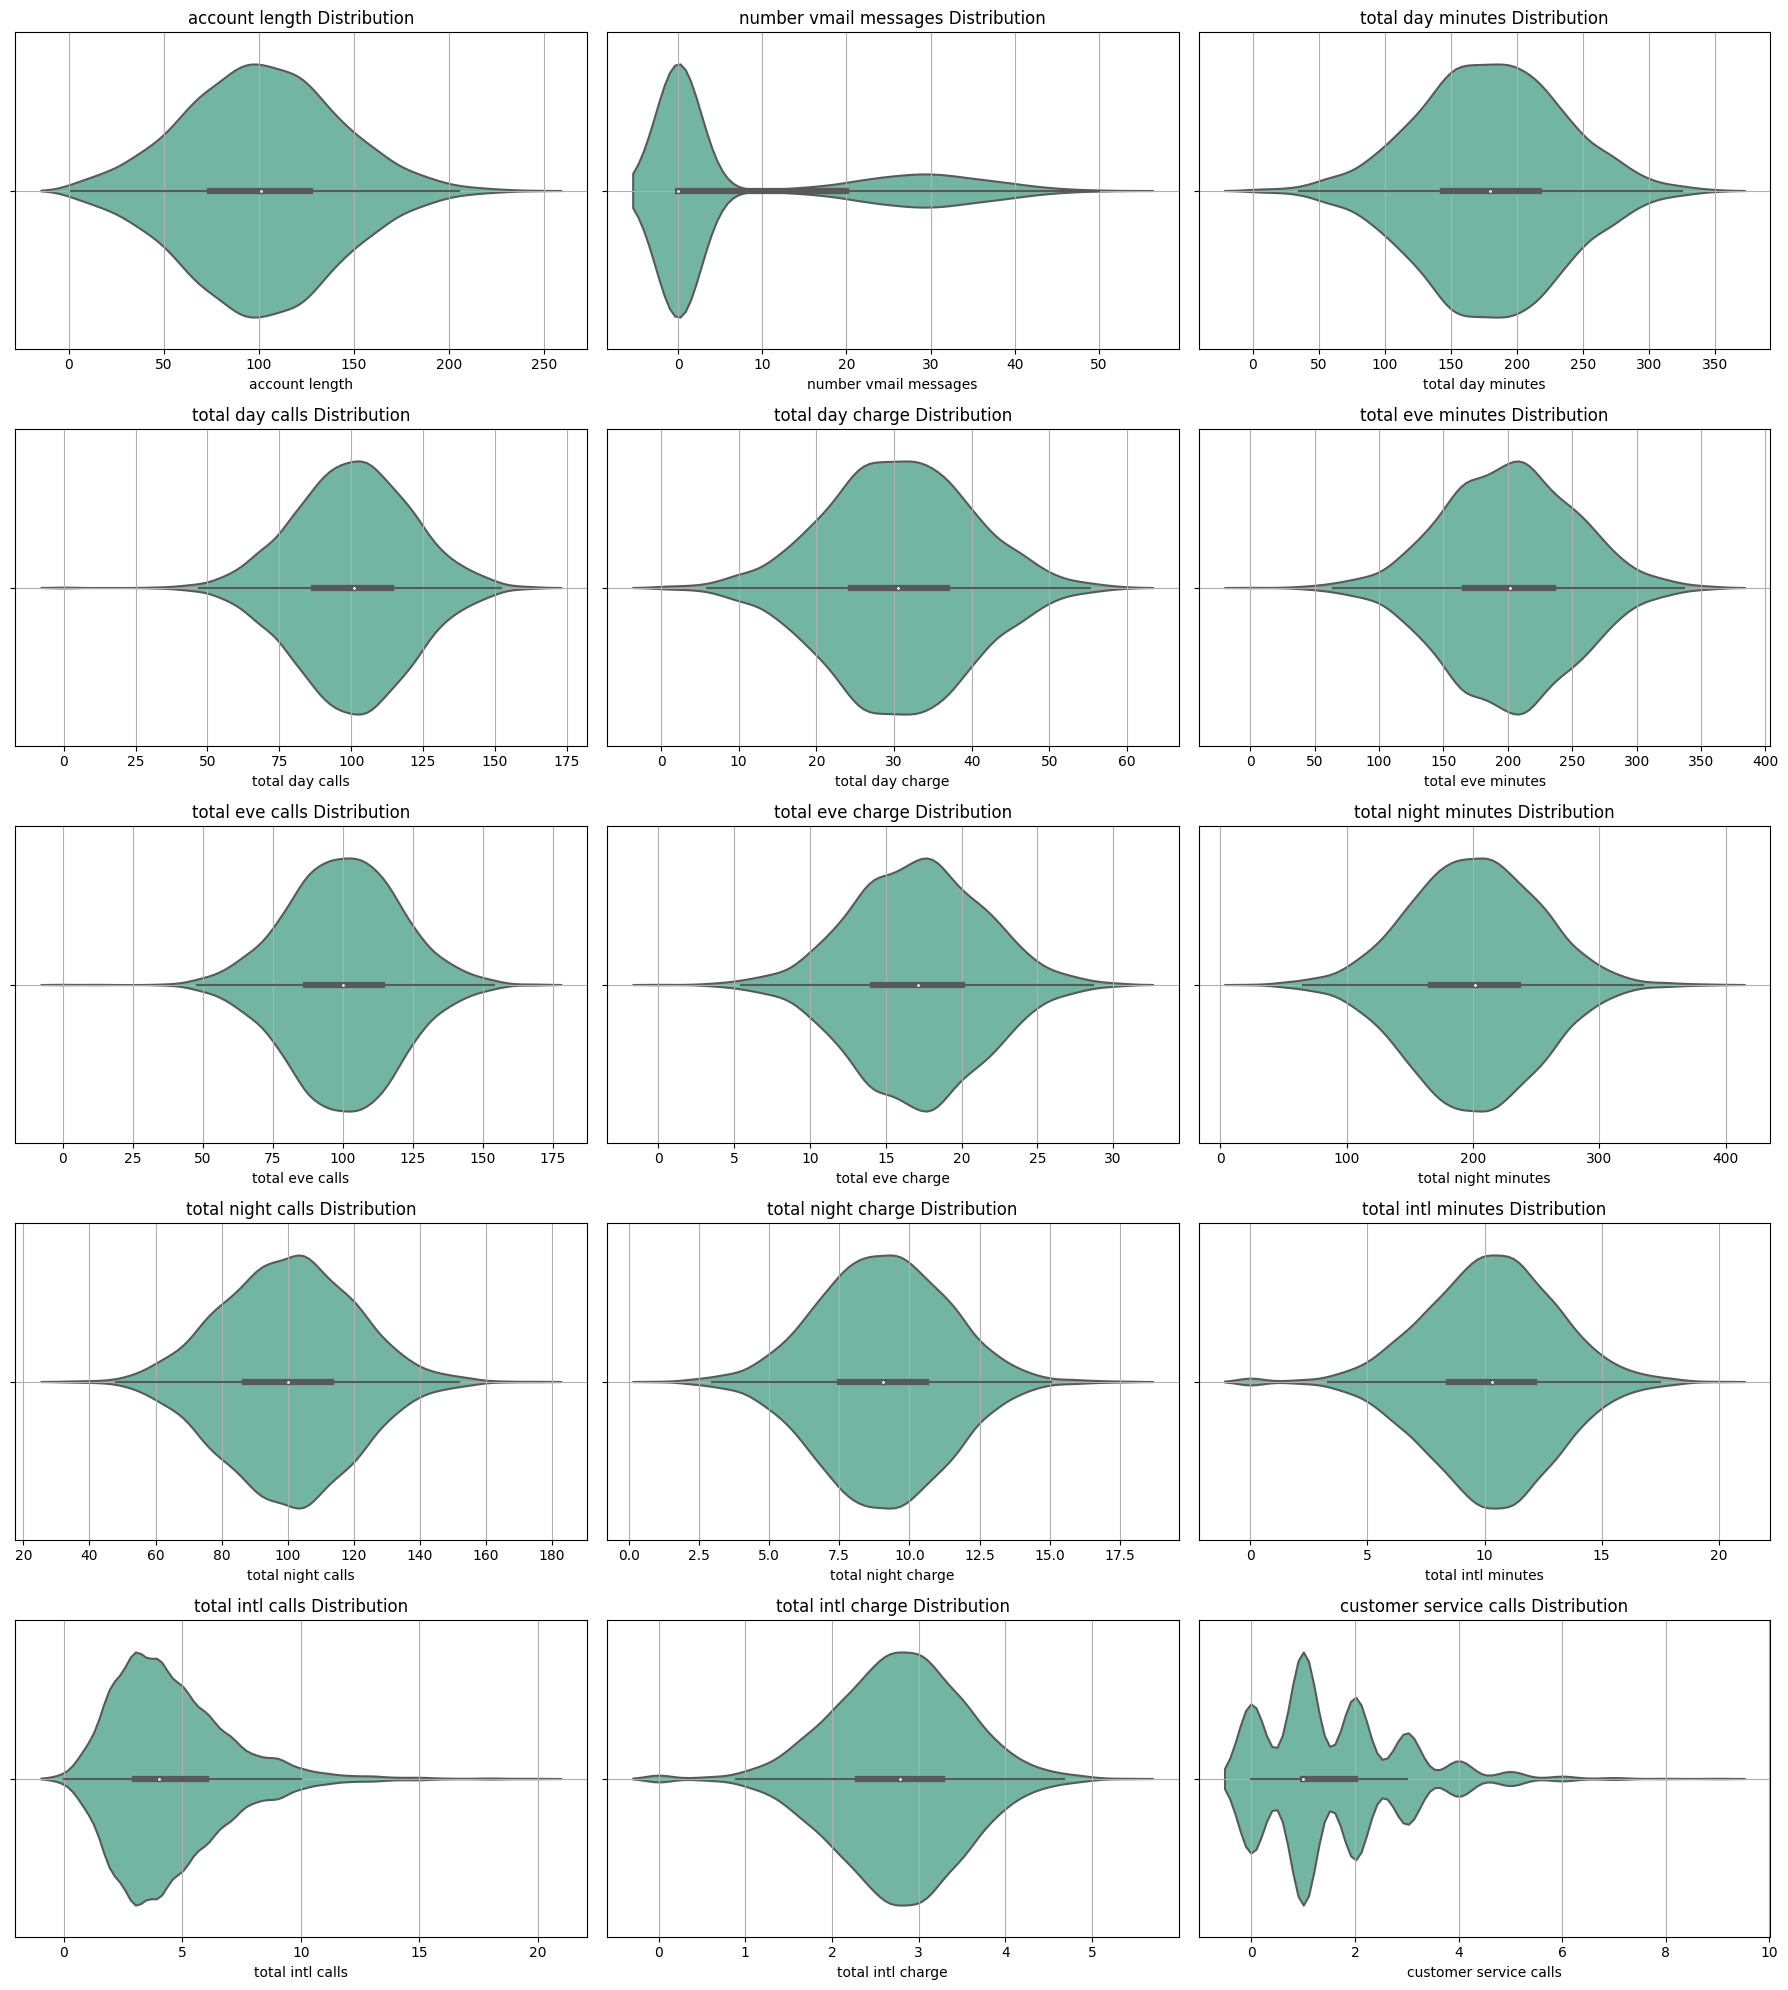

In [15]:
numerical_features = df.select_dtypes(include=['float64','int64']).columns

fig , axes = plt.subplots(len(numerical_features)//3, 3, figsize=(18,20))
palette = sns.color_palette('Set2')
for i, col in enumerate(numerical_features):
    row , col_idx = divmod(i,3)
    sns.violinplot(x=col, data=df, ax=axes[row, col_idx],palette=palette)
    axes[row, col_idx].set_title(f'{col} Distribution')
    axes[row, col_idx].grid(True)
    
if len(numerical_features) % 3 != 0:
    for j in range(len(numerical_features) % 3,3):
        fig.delaxes(axes[-1,j])

plt.tight_layout()
plt.show()
    

We see that out of 15 numerical features, 3 features are not distributed normally, namely:
* number vmail messages
* total intl calls
* customer service calls

we can proceed in two ways:
1. Leave them as it is. Then only use tree-based models(XGBoost, Random Forest, Light GBM etc)since models like Logistic Regression, LDA, Naive Bayes, SVM etc assume normally distributed features.
2. Apply transformations so that we are free to use most of the models.

We will be applying transformations in the feature engineering step.


# Distribution of categorical features

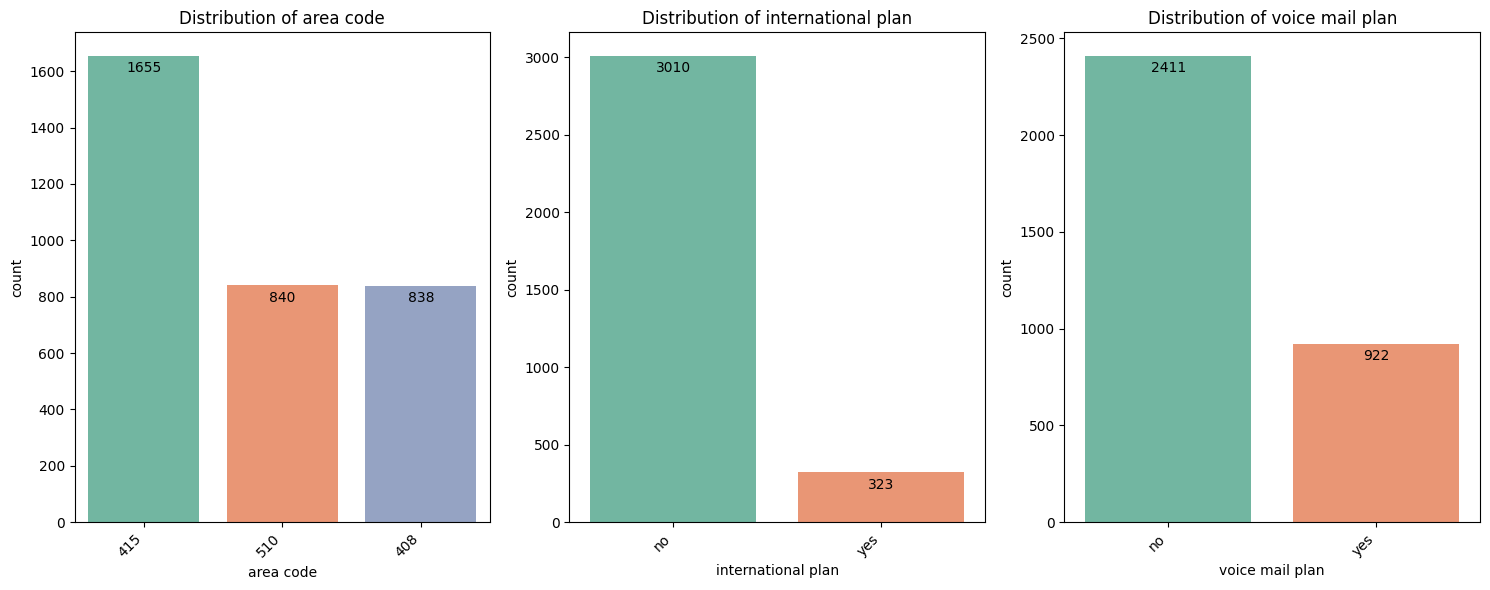

In [16]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features = categorical_features.drop('state')

fig , axs = plt.subplots(1,3,figsize=(15,6))
axs = axs.flatten()

palette = sns.color_palette("Set2")

for i , feature in enumerate(categorical_features[:10]):
    plot = sns.countplot(x=df[feature],ax=axs[i],order=df[feature].value_counts().index, palette=palette)

    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'),(p.get_x() + p.get_width() / 2. , p.get_height()), ha ='center' , va = 'center' , xytext = (0 , -9), textcoords = 'offset points')

    axs[i].set_title(f'Distribution of {feature}')
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=45,horizontalalignment='right')

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


# Correlation Matrix & Pairplot for Numerical Features

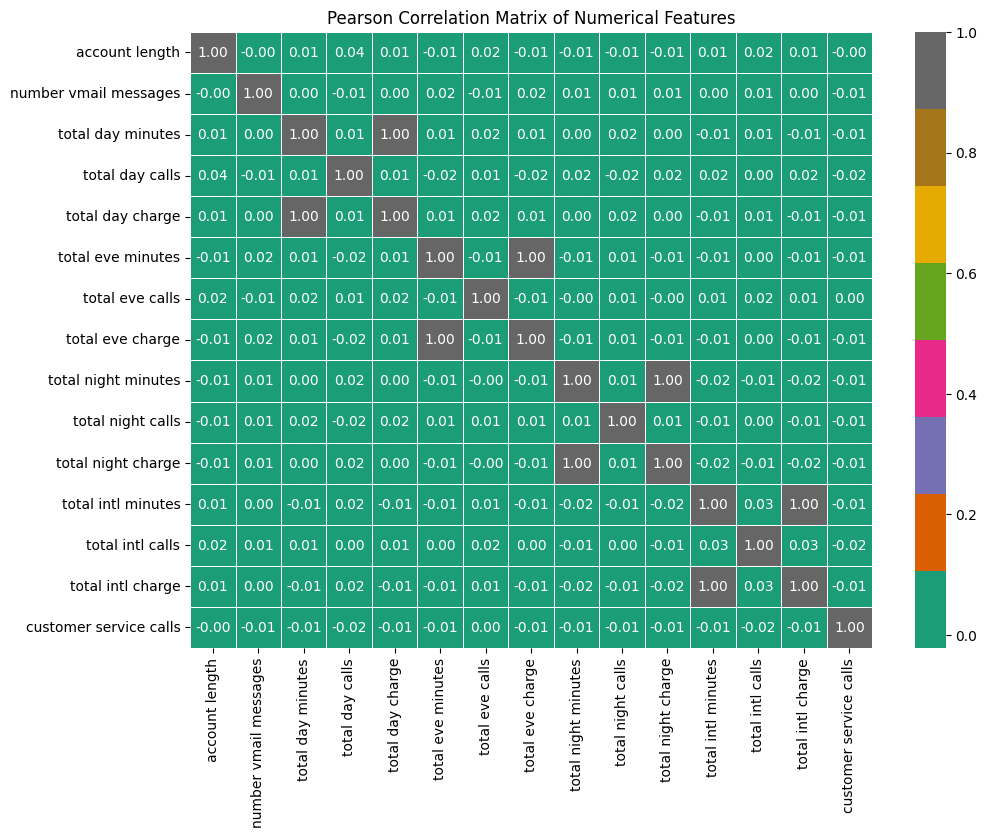

In [17]:
#correlation of numerical variables
pearson_correlation_matrix = df[numerical_features].corr(method = 'pearson')

plt.figure(figsize=(11,8))
sns.heatmap(pearson_correlation_matrix, annot=True, fmt=".2f",cmap='Dark2',linewidths=0.5)

plt.title('Pearson Correlation Matrix of Numerical Features')
plt.show()

<ipython-input-18-0621aa23c013>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace([np.inf, -np.inf], np.nan, inplace=True)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/pytho

<Figure size 1200x800 with 0 Axes>

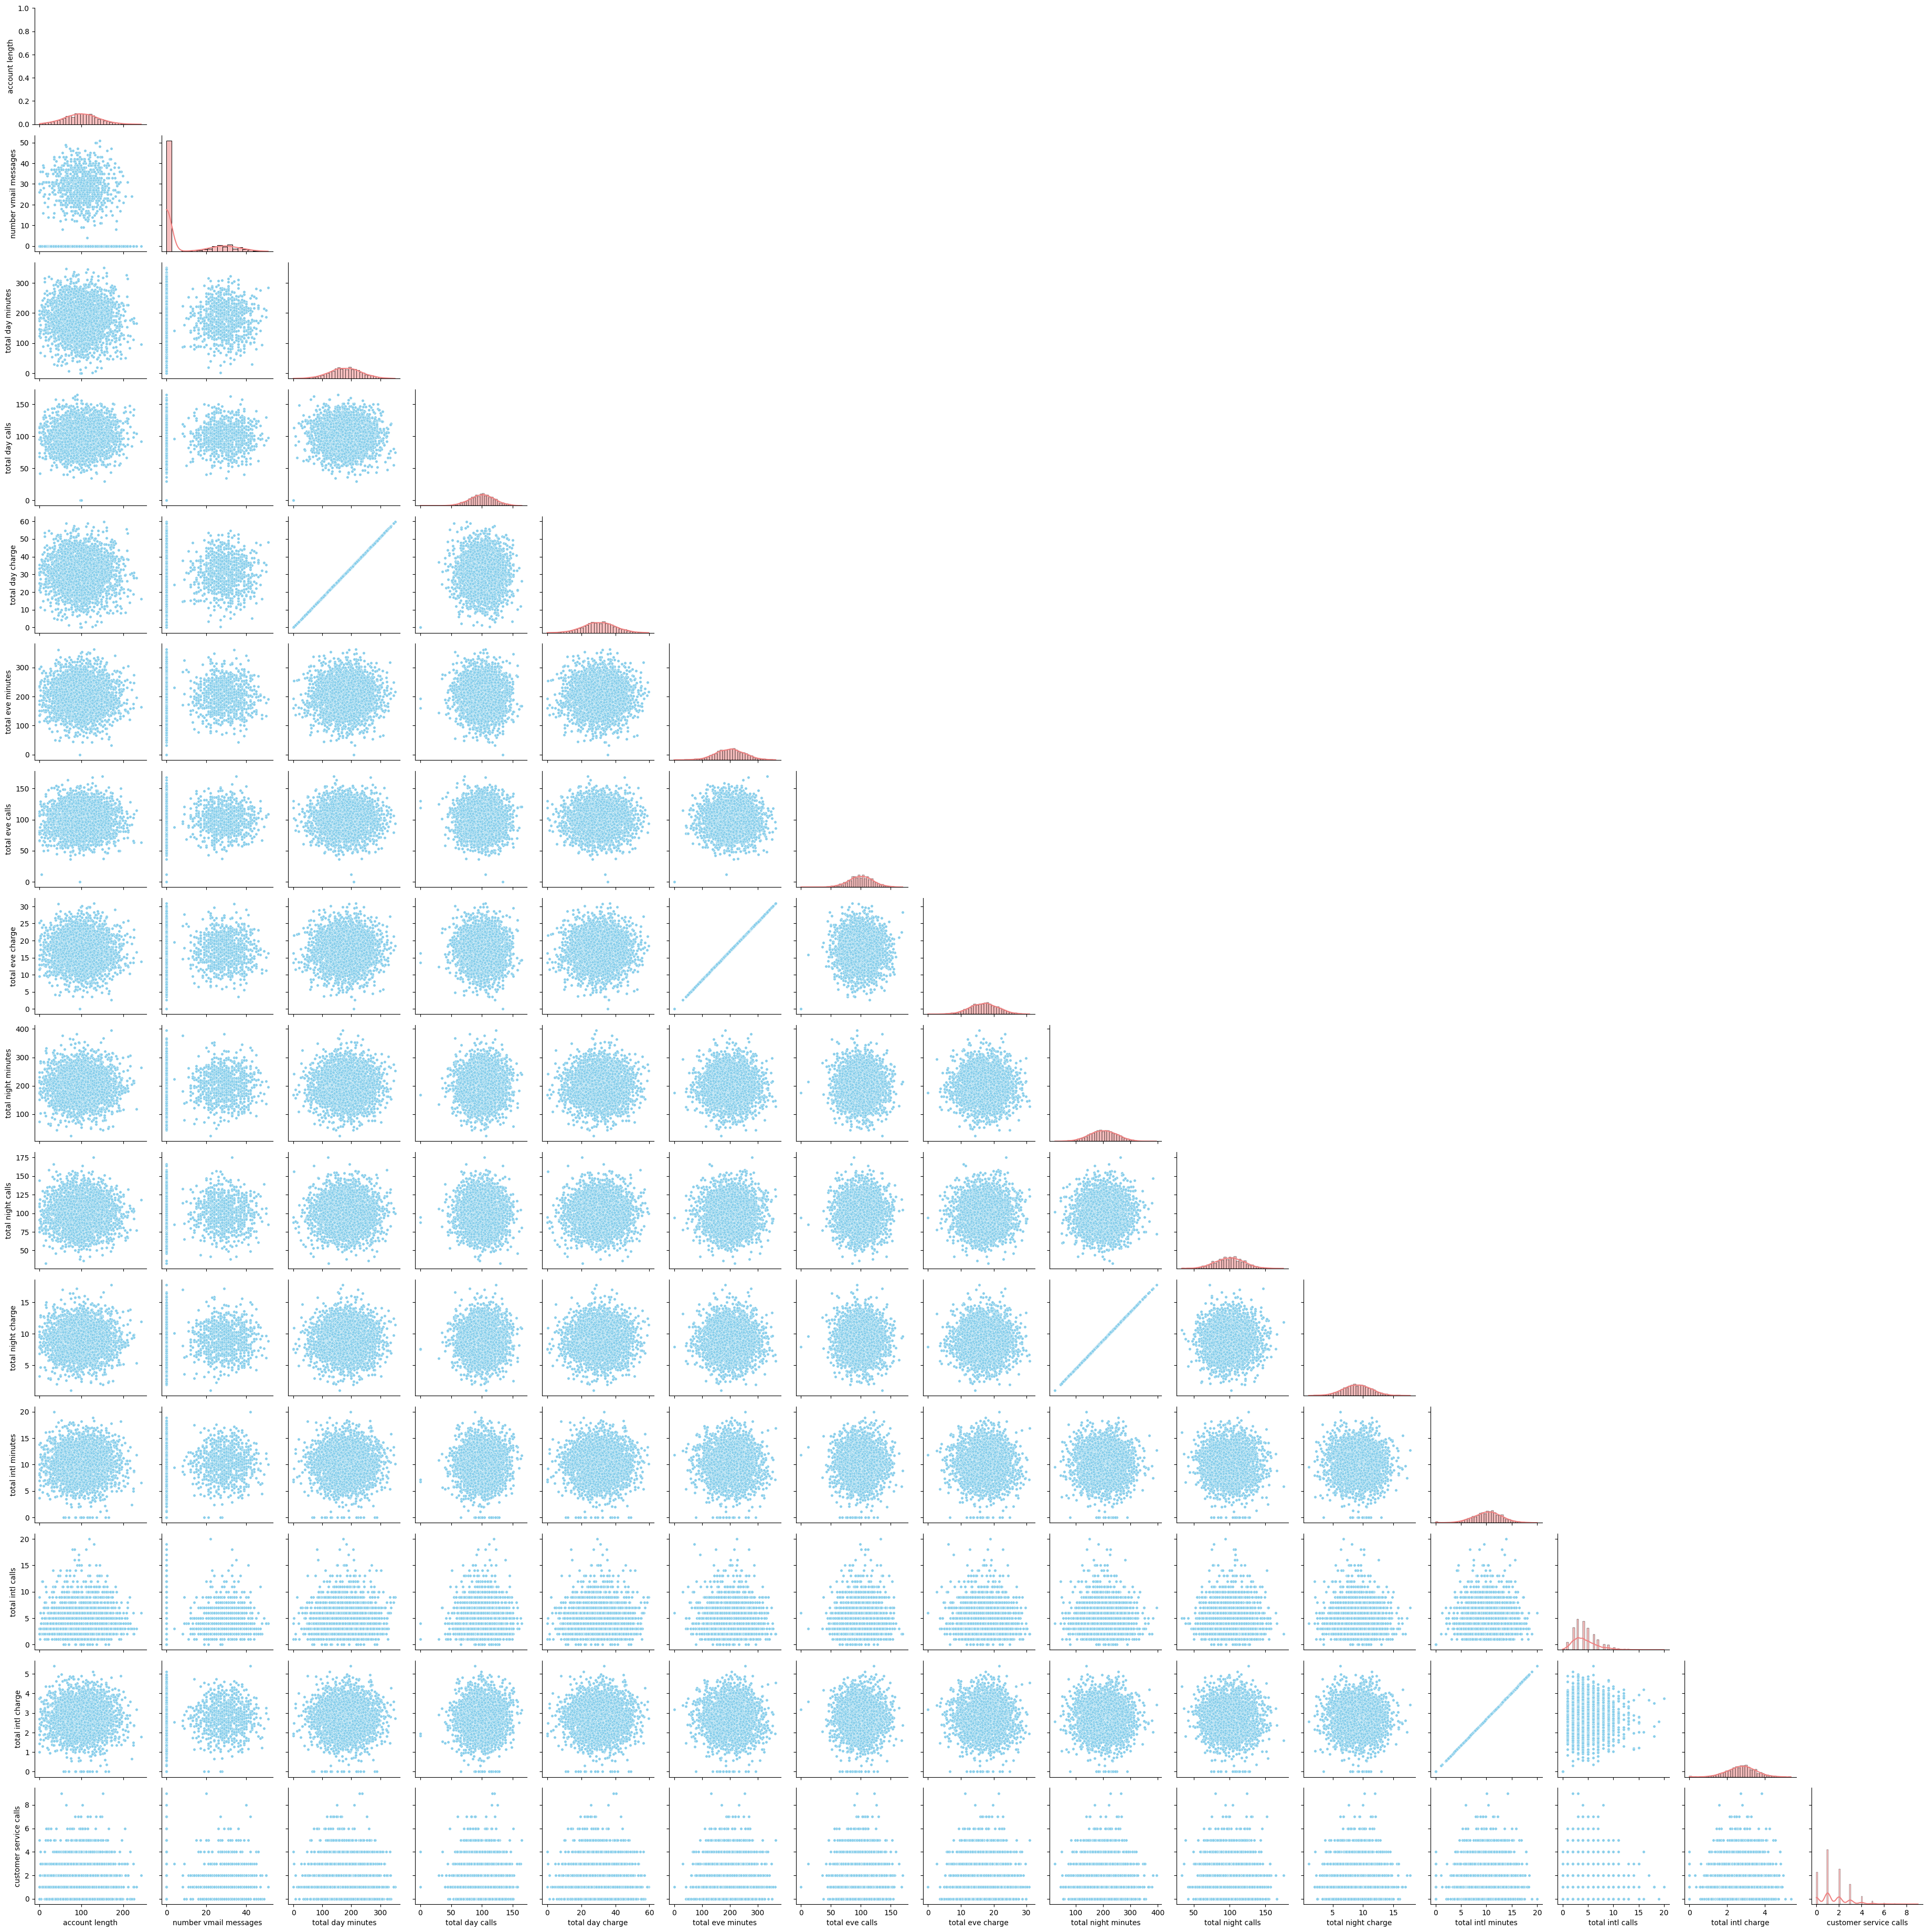

In [18]:
palette = sns.color_palette("Set2")
plt.figure(figsize=(12,8))

def below_diag_pairplot(data,variables):
    data = data.copy()  
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    pd.set_option('future.no_silent_downcasting', True)

    
    g = sns.PairGrid(data[variables])
    g.map_lower(sns.scatterplot, s=15, color='skyblue')
    g.map_diag(sns.histplot, color='lightcoral', kde=True, palette = palette)

    for i , j in zip(*np.triu_indices_from(g.axes, 1)):
        g.axes[i,j].set_visible(False)
    plt.show()
below_diag_pairplot(df,numerical_features)

# Association Matrix of Categorical Features

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


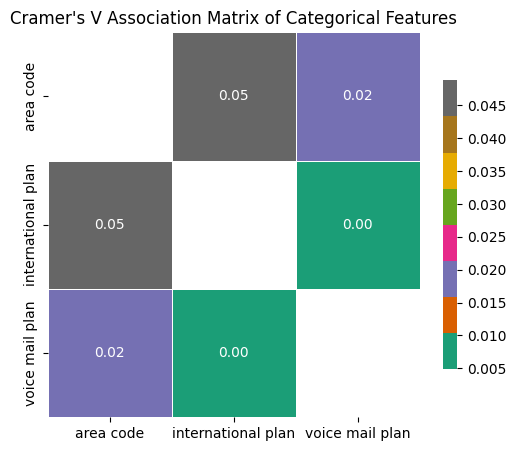

In [19]:
from scipy.stats import chi2_contingency

def cramers_v(x,y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r , k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r,k) - 1)))

cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_features), len(categorical_features))), index=categorical_features, columns=categorical_features)

for col1 in categorical_features:
    for col2 in categorical_features:
        if col1 != col2:
            cramers_v_matrix.loc[col1 , col2] = cramers_v(df[col1],df[col2])
        else:
            cramers_v_matrix.loc[col1 , col2] = np.nan

plt.figure(figsize = (6,5))
sns.heatmap(cramers_v_matrix, annot=True, cmap='Dark2', linewidths=0.5, fmt='.2f', cbar_kws={"shrink": .75})
plt.title("Cramer's V Association Matrix of Categorical Features")
plt.show()


We can see that we have few numerical features that are highly correlated:
* total day minutes & total day charge(100%)
* total eve minutes & total eve charge (100%)
* total night minutes & total night charge(100%)
* total intl minutes & total intl charge (100%)

we need to exclude some to avoid multi-collinearity. This will be done in *Feature selection* step.

# *Correlation of Features with Churn (Target Variable)*

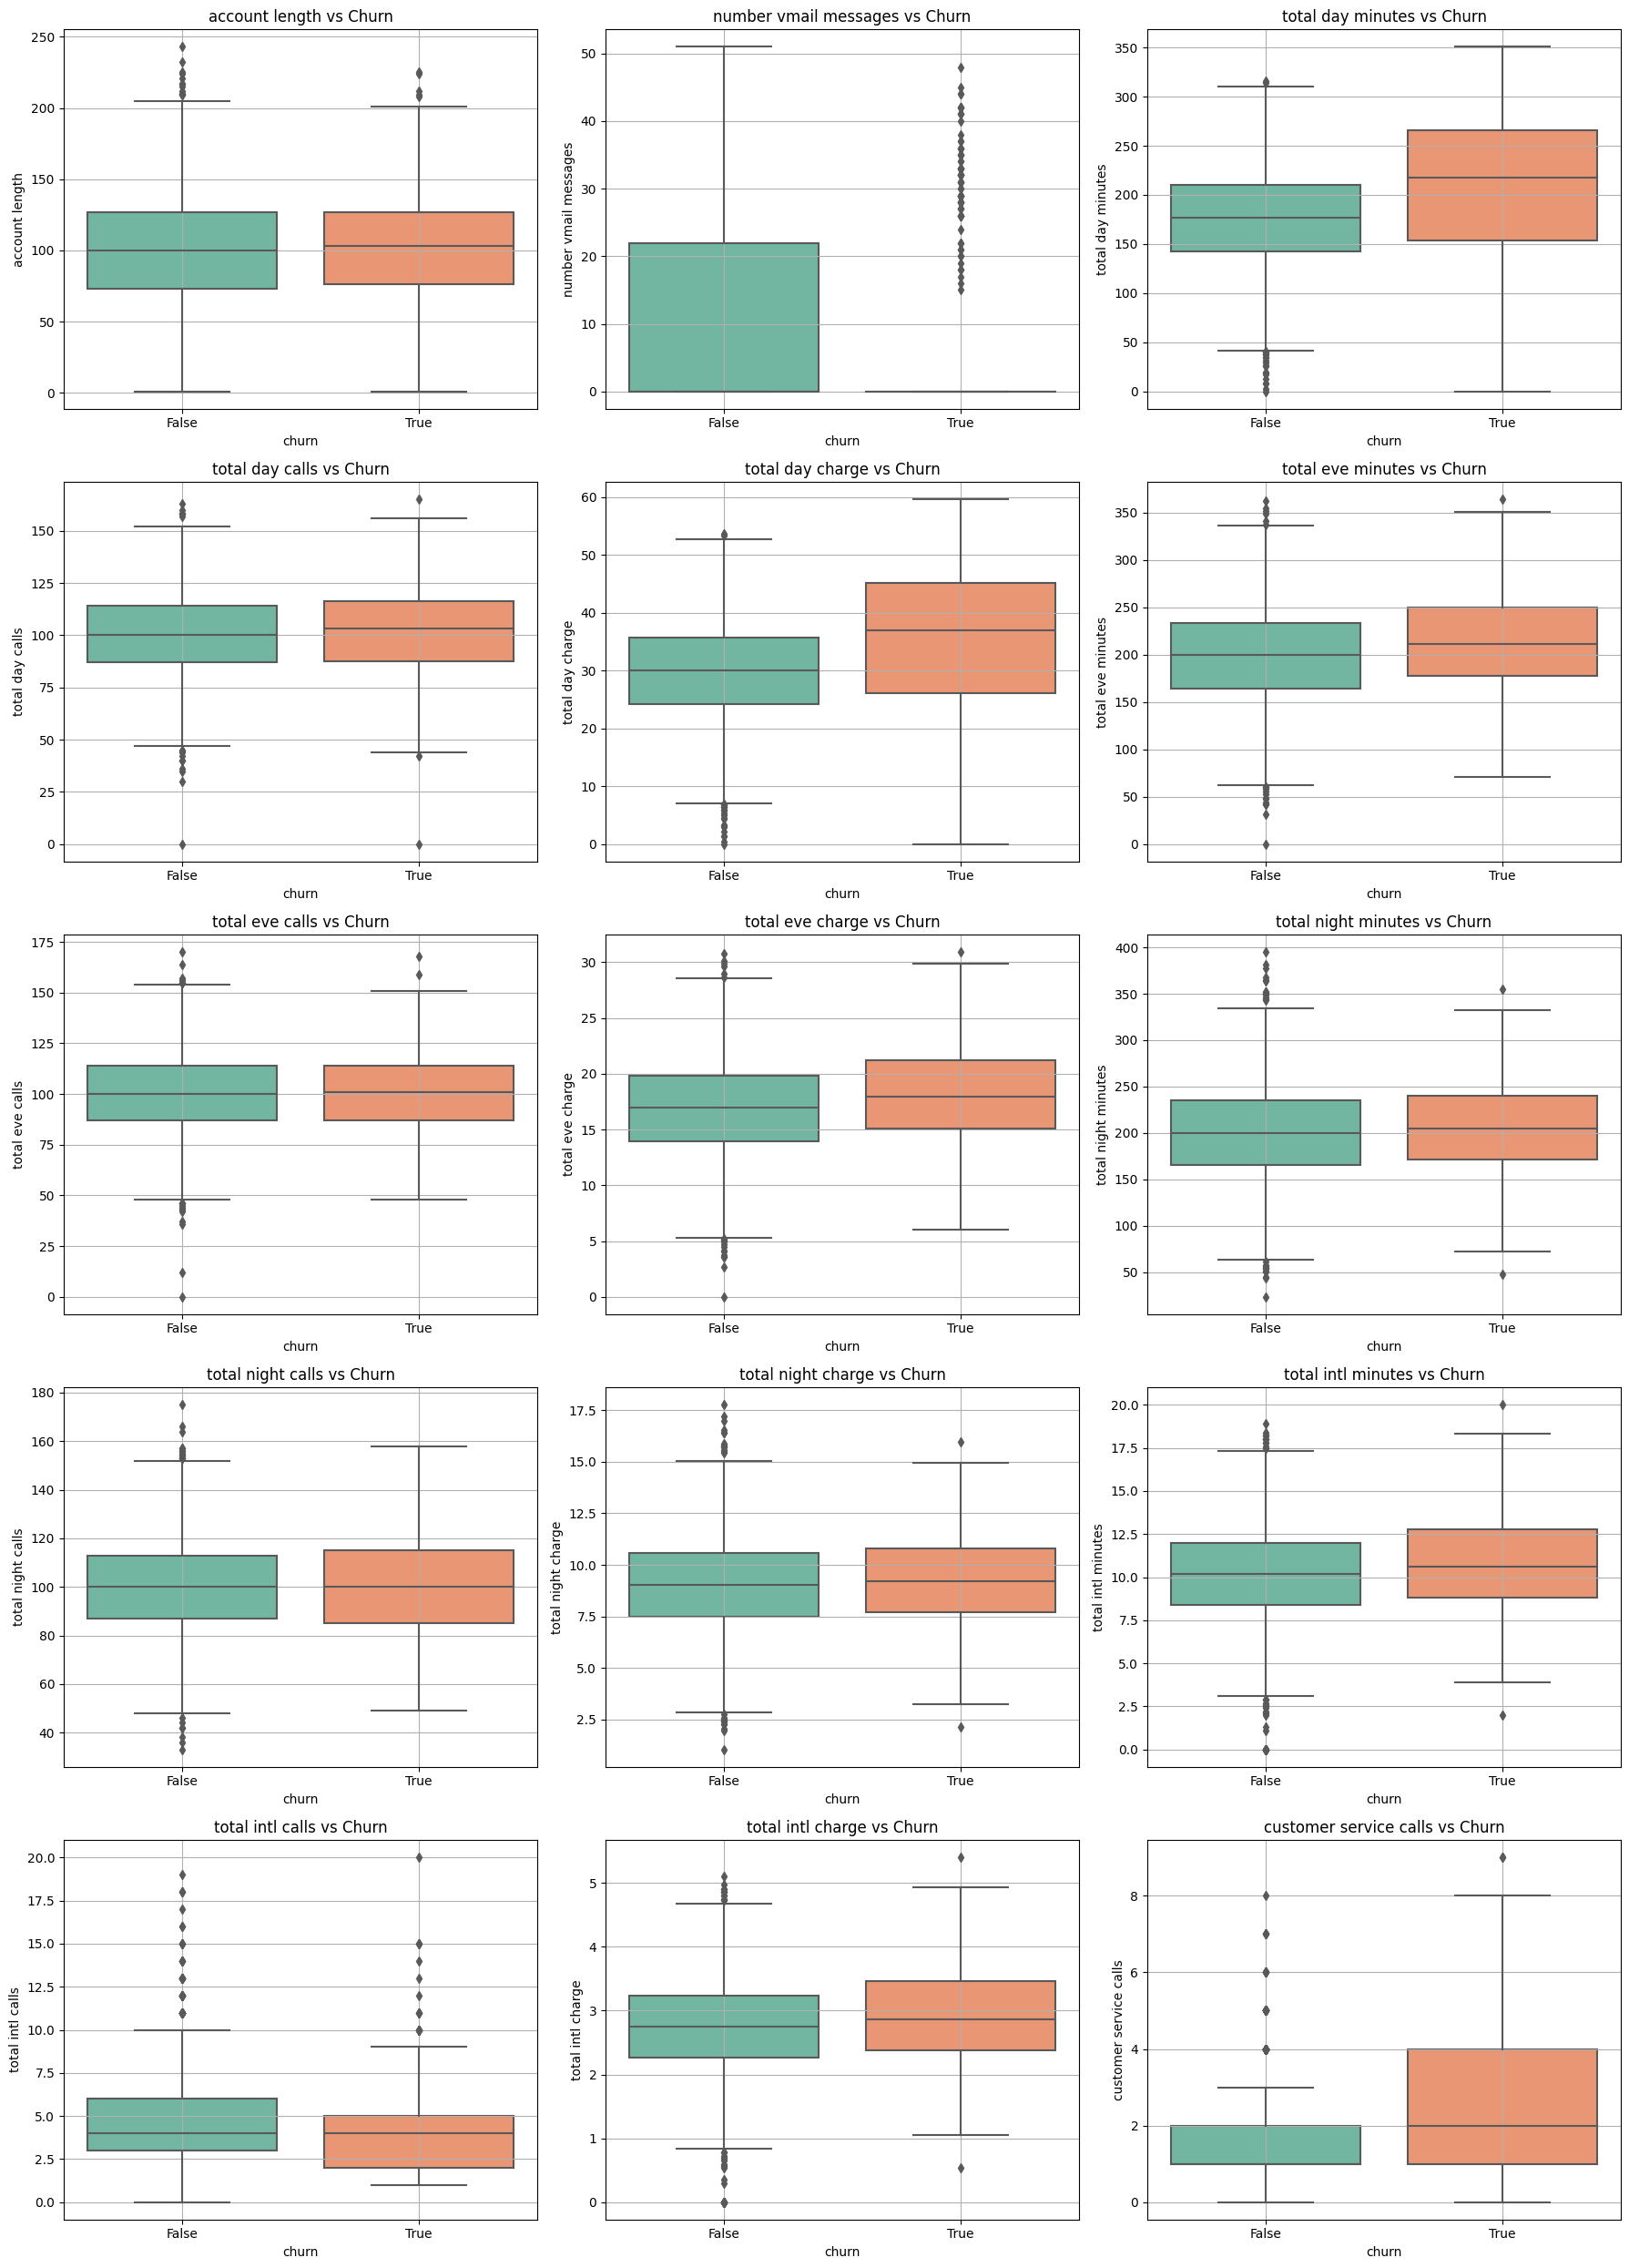

In [20]:
#Correlation of Numerical Features
plt.figure(figsize=(18,25))
for i , col in enumerate(numerical_features):
    plt.subplot(5,3,i+1)
    sns.boxplot(x='churn', y=col, data=df, palette=palette)
    plt.title(f'{col} vs Churn')
    plt.grid(True)

plt.tight_layout()
plt.show()

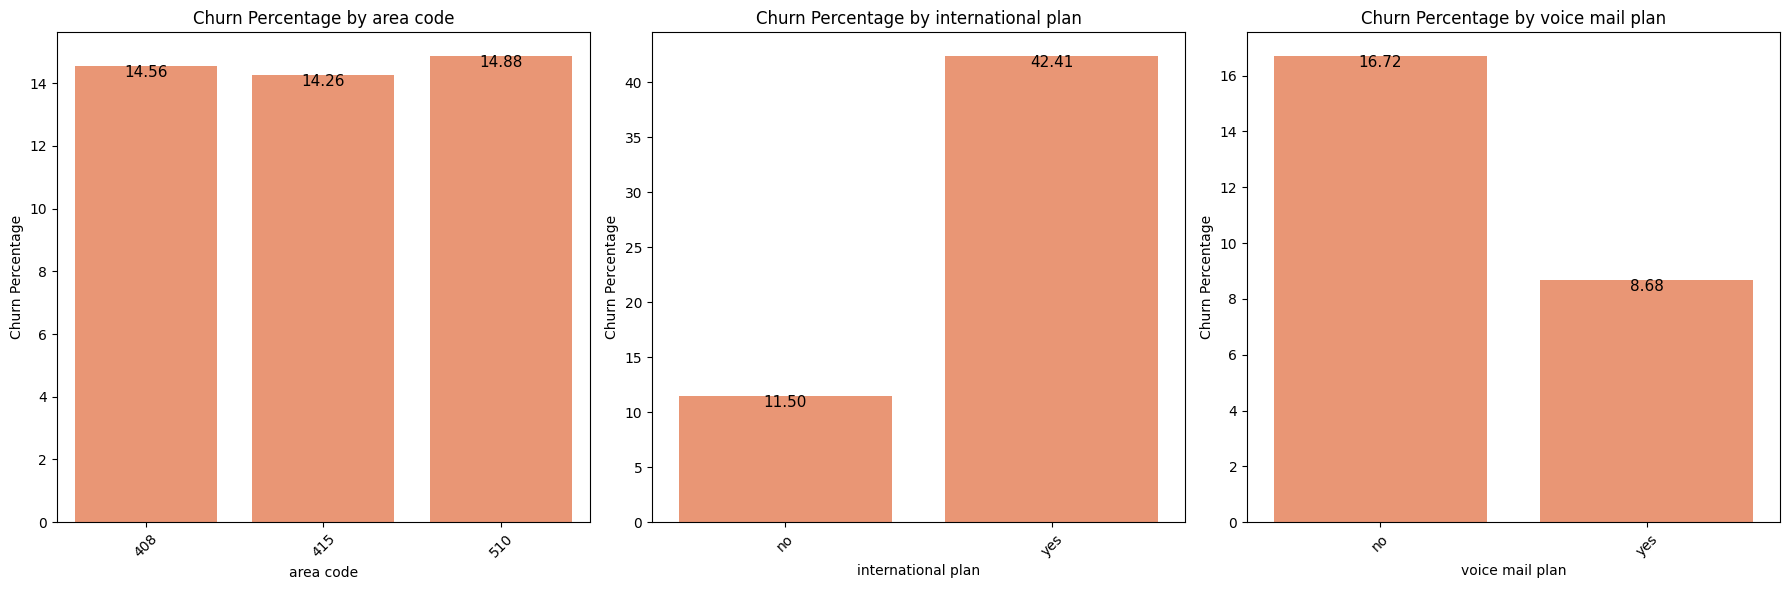

In [21]:
#categorical features and churn
churn_col = 'churn' #This should be the column indicating churn (True for churned, False for not churned)
plt.figure(figsize=(18,6))

for i , col in enumerate(categorical_features):
    plt.subplot(1, 3, i + 1)

    #calculate churn counts for each category
    churn_counts = df.groupby(col)[churn_col].value_counts(normalize=True).unstack()

    #calculate churn percentage (Percentage of True values)
    churn_counts['churn_percentage'] = churn_counts[True] * 100 #using True insted of 1
    
    #Resetting index for plotting
    churn_counts = churn_counts.reset_index()

    #Plotting
    ax = sns.barplot(x=col, y='churn_percentage',data=churn_counts, color='#FC8D62')

    plt.title(f'Churn Percentage by {col}')
    plt.xlabel(col)
    plt.ylabel('Churn Percentage')
    plt.xticks(rotation=45)

    #Adding percentages below the bars
    for p in ax.patches:
        percentage = f'{p.get_height():.2f}' #Format percentage to 2 decimal places
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center' , va='bottom',fontsize=11, color='black', xytext=(0,-10), textcoords='offset points')

plt.tight_layout()
plt.show()

We can see that in numerical features, the following could be good predictors of churn:

* total day minutes
* total day charge (Churned customers have very high charges)
* total eve minutes
* total eve charge (Churned customers have moderately high charges)
* customer service calls (Churned customers have higher calls)

In categorical features, the following could be good predictors:

* Having international plan (4x more churn than NOT having)
* Having Voice mail plan (Half churn rate comapred to NOT having)

# Feature Engineering

* transform non-normally distributed features
* perform train-test split
* Encoding Categorical Features
* Scaling Numerical Features

# Transform non-normally distributed features

We saw in EDA step that out of 15 numerical features, 3 featuresare not distributed normally, namely:

* number vmail messages
* total intl calls
* customer service calls

# Number vmail Messages

The distribution shows Zero-Inflation (72% of values are 0) and remaining 28% being normally distributed. We can try various things here like:

1. Binning
2. Binary Indicator for Zero/Non-Zero followed by transforming Non-zero values etc.

we will do Binning

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


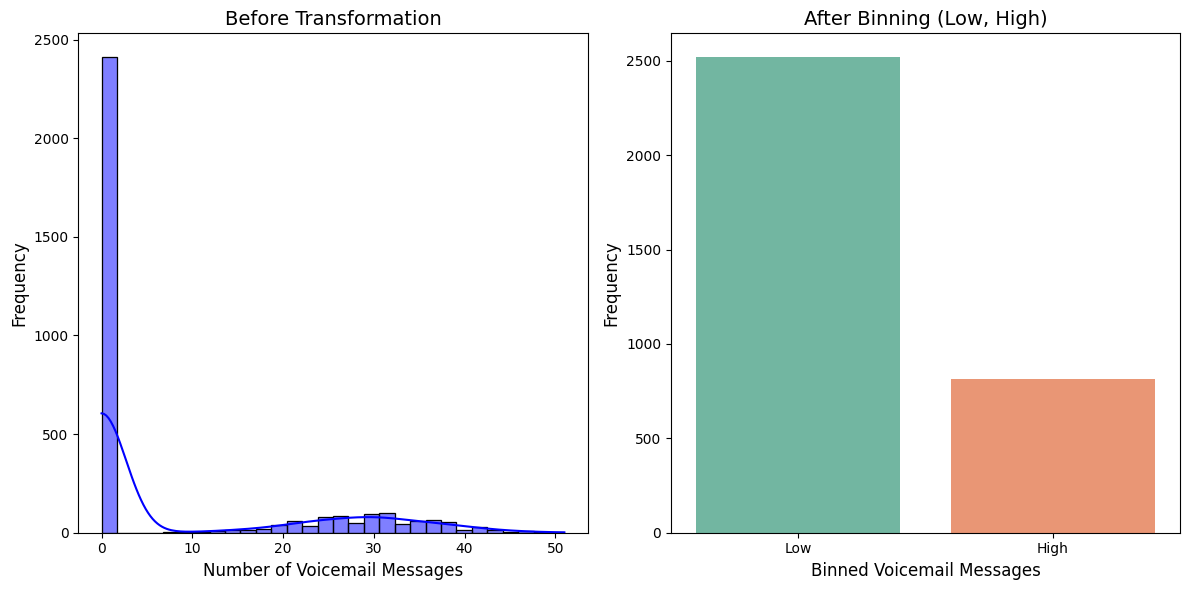

In [23]:
# Original Distribution Plot

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df['number vmail messages'],kde=True, bins=30, color='blue')
plt.title('Before Transformation', fontsize=14)
plt.xlabel('Number of Voicemail Messages', fontsize=12)
plt.ylabel('Frequency',fontsize=12)

#Binning the 'number vmail messages' column into 2 bins: 0-20, 20+
bins = [0 , 21, np.inf]
labels = ['Low','High']
df['binned_voicemail'] = pd.cut(df['number vmail messages'], bins=bins, labels=labels, right=False)

#Binned Distribution Plot
plt.subplot(1,2, 2)
sns.countplot(x='binned_voicemail',data=df,palette='Set2')
plt.title('After Binning (Low, High)',fontsize=14)
plt.xlabel('Binned Voicemail Messages', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()


# total intl calls

Original distribution is right-skewed. We can try multiple transformations here like:

1. Logarithmic Transformation
2. Square Root Transformation
3. Box-cox transformation

we will be doing logarithmic transformation, particularly log(1+x), to avoid log 0 errors.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


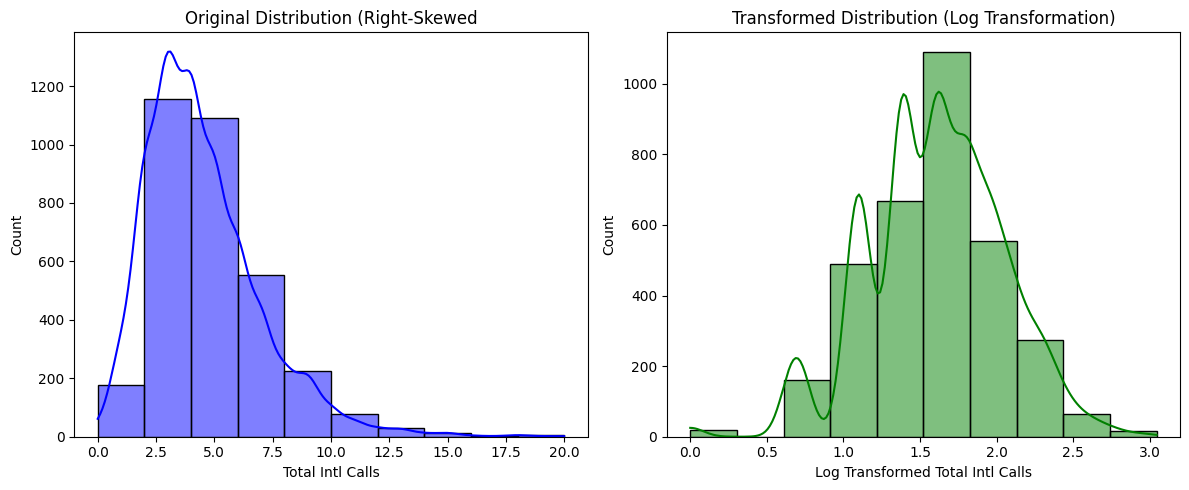

In [24]:
#Plot the original distribution (before transformation)
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(df['total intl calls'],bins=10, kde=True, color='blue')
plt.title('Original Distribution (Right-Skewed')
plt.xlabel('Total Intl Calls')

#Apply log transformation to reduce skewness (ading 1 to avoid Log(0))
df['total_intl_calls_log'] = np.log1p(df['total intl calls'])

#plot the transformed distribution (after log transformation)
plt.subplot(1, 2, 2)
sns.histplot(df['total_intl_calls_log'],bins=10,kde=True, color='green')
plt.title('Transformed Distribution (Log Transformation)')
plt.xlabel('Log Transformed Total Intl Calls')

plt.tight_layout()
plt.show()